In [72]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib

In [73]:
df = pd.read_csv('./data/crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [74]:
def encode_crop(df_crop):
  le = LabelEncoder()
  encoded_crops = le.fit_transform(df_crop['label'])
  dict_crop = {}
  for i in range(len(encoded_crops)):
    dict_crop[df_crop.loc[i, "label"]] = encoded_crops[i]

  df_crop["label"] = df_crop["label"].map(dict_crop)
  return df_crop, dict_crop

def decode_crop(dict_crop, crop):
  for key, value in dict_crop.items():
    if value == crop:
      return key
    
def standardize(x, type):
    scaler = StandardScaler().fit(x)
    x_scaled = scaler.transform(x)

    joblib.dump(scaler, f"./{type}_scaler.gz")

    return x_scaled

In [75]:
df_crop, dict_crop = encode_crop(df)

X = df_crop.drop('label', axis='columns')
Y = df_crop.label

x_scaled = standardize(X, "all")
X_train, X_test, y_train, y_test = train_test_split(x_scaled, Y, test_size=0.2)
X_train[0]

array([-1.15288641, -0.76907123, -0.35841972, -0.01976435,  1.0266917 ,
       -0.58649554,  0.57626858])

In [76]:
labels = [key for key, value in sorted(dict_crop.items())]
labels

['apple',
 'banana',
 'blackgram',
 'chickpea',
 'coconut',
 'coffee',
 'cotton',
 'grapes',
 'jute',
 'kidneybeans',
 'lentil',
 'maize',
 'mango',
 'mothbeans',
 'mungbean',
 'muskmelon',
 'orange',
 'papaya',
 'pigeonpeas',
 'pomegranate',
 'rice',
 'watermelon']

# Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train, y_train)

y_pred = logistic_regression.predict(X_test)
y_pred_train = logistic_regression.predict(X_train)

print("Train Accuracy of Logistic Regression: ", accuracy_score(y_train, y_pred_train))
print("Test Accuracy of Logistic Regression: ", accuracy_score(y_test, y_pred))


Train Accuracy of Decision Tree:  0.9767045454545454
Test Accuracy of Logistic Regression:  0.9568181818181818


# Decision Tree Classifier

In [78]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)
y_pred_train = decision_tree.predict(X_train)

print("Train Accuracy of Decision Tree: ", accuracy_score(y_train, y_pred_train))
print("Test Accuracy of Decision Tree: ", accuracy_score(y_test, y_pred))

Train Accuracy of Decision Tree:  1.0
Test Accuracy of Decision Tree:  0.9886363636363636


### Plot Decision Tree

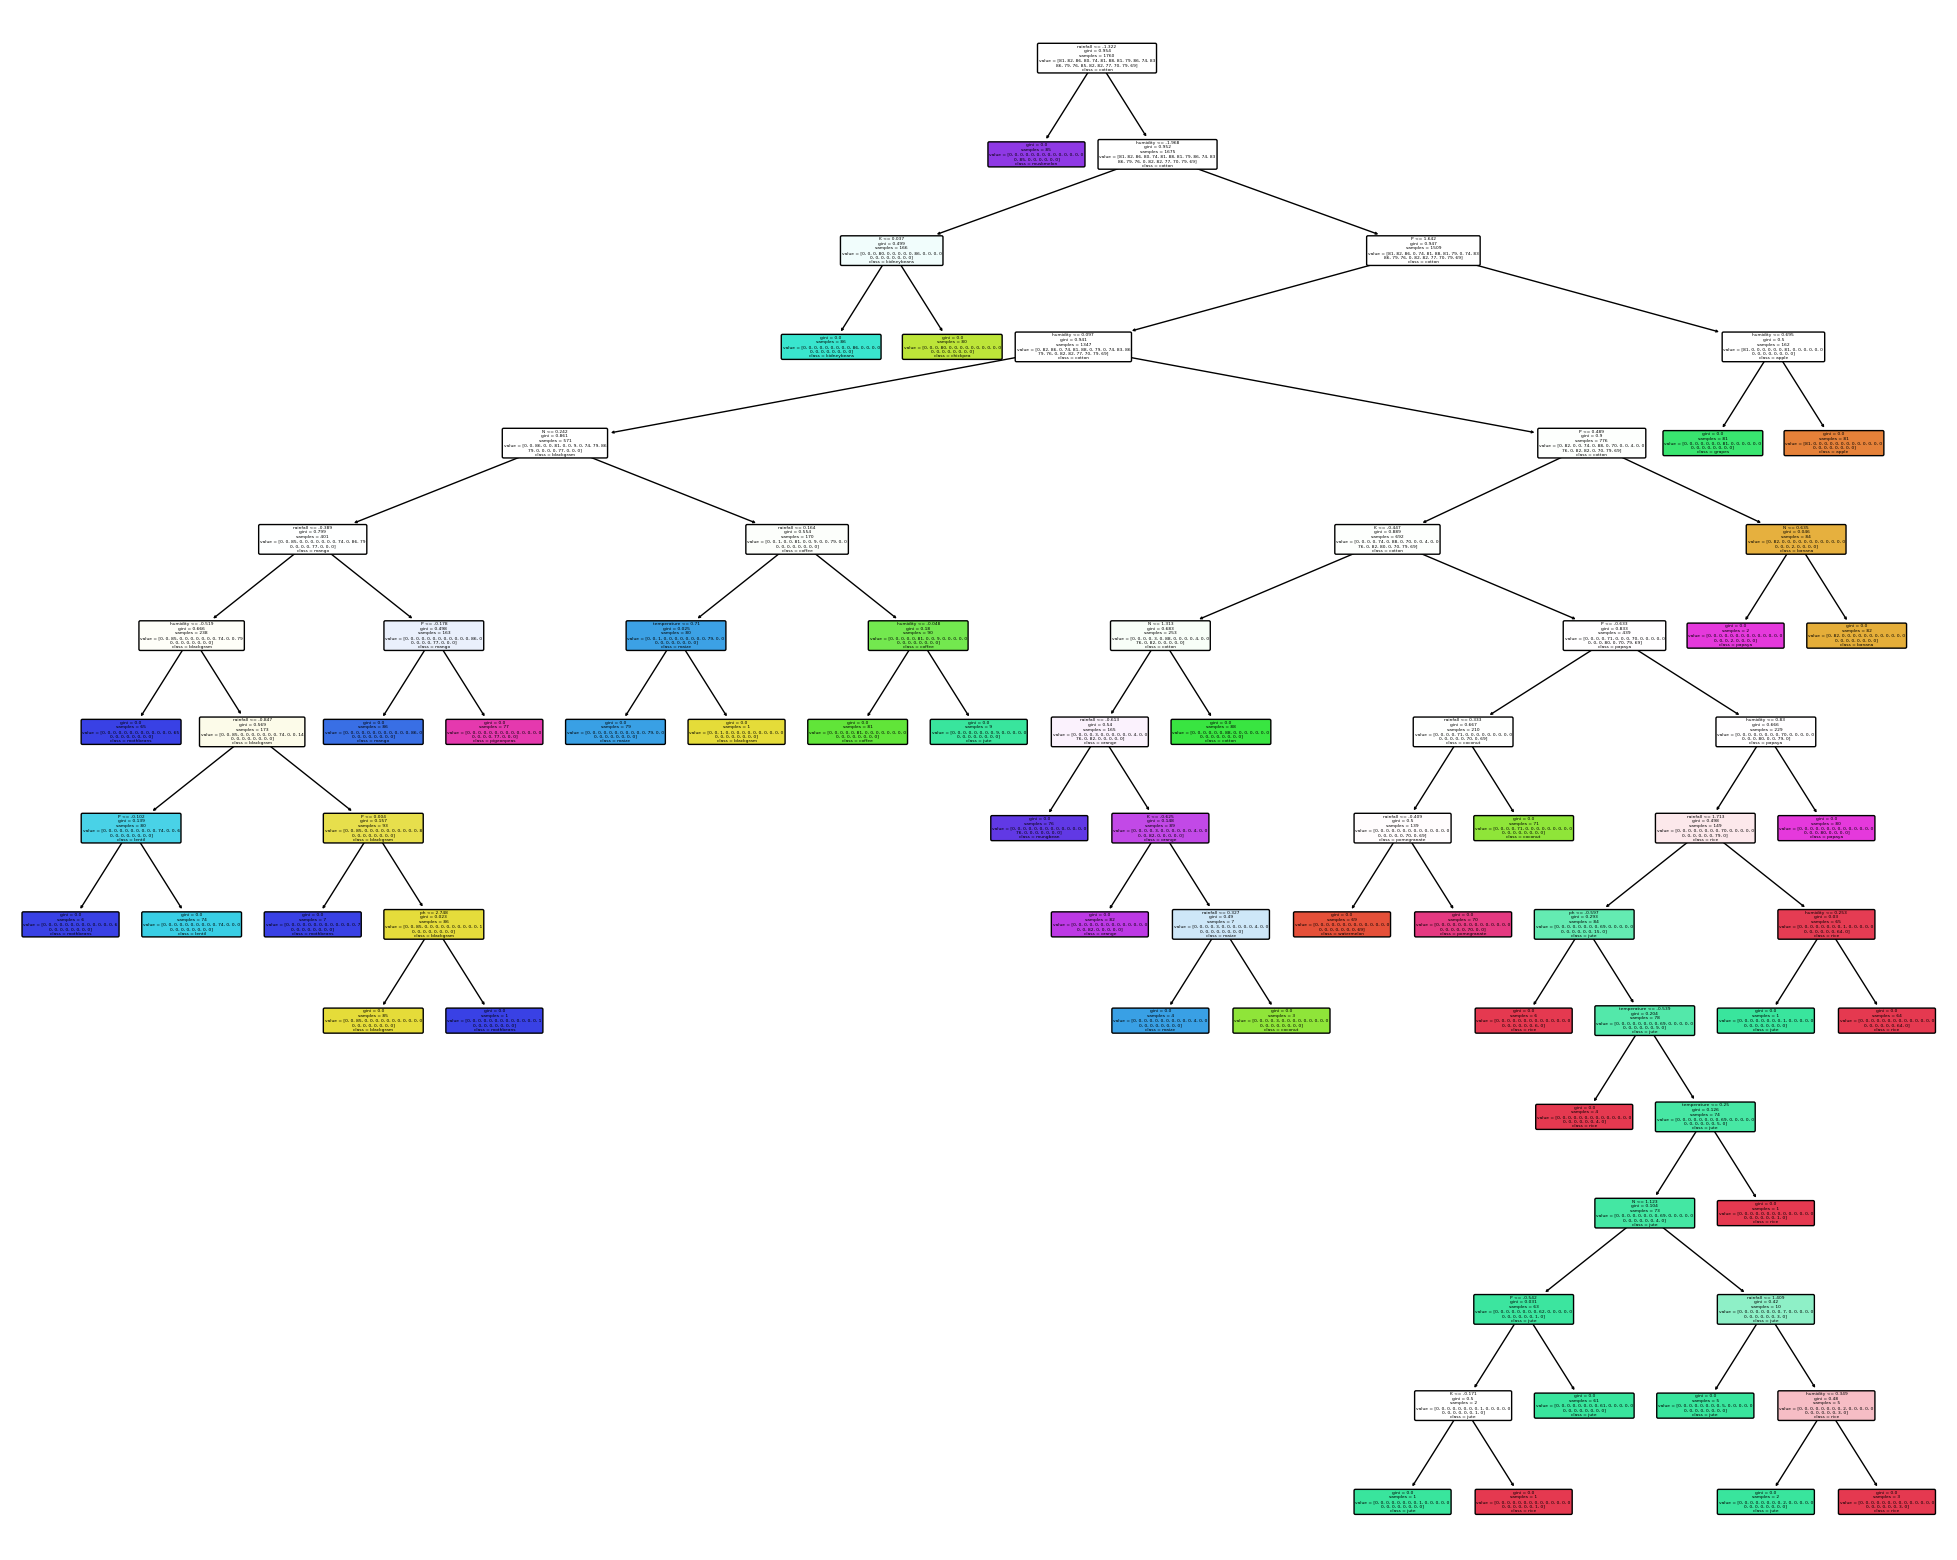

In [79]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(25, 20))
plot_tree(decision_tree, filled=True, rounded=True, feature_names=df_crop.columns[:-1], class_names=labels)
plt.savefig("decision_tree.png", dpi=600)
plt.show()

# Random Forest Classifier

In [105]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(max_depth=15, n_estimators=40)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)
y_pred_train = random_forest.predict(X_train)

print("Train Accuracy of RFC: ", accuracy_score(y_train, y_pred_train))
print("Test Accuracy of RFC: ", accuracy_score(y_test, y_pred))

Train Accuracy of RFC:  1.0
Test Accuracy of RFC:  0.9931818181818182


In [126]:
from sklearn.svm import SVC
svc = SVC(C=15, gamma=1)
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
y_pred_train = svc.predict(X_train)

print("Train Accuracy of SVC: ", accuracy_score(y_train, y_pred_train))
print("Test Accuracy of SVC: ", accuracy_score(y_test, y_pred))

Train Accuracy of SVC:  1.0
Test Accuracy of SVC:  0.9863636363636363


In [84]:
tmp = random_forest.predict_proba([X_test[1]])[0]
top_3 = sorted(range(len(tmp)), key=lambda i: tmp[i])[-3:]
top_3

for i in top_3:
  print(decode_crop(dict_crop, i))

rice
watermelon
chickpea
